## 1. Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean,std
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load data
path='C:/Users/Pragya/2nd sem/ML'

In [3]:
# Defining a function that loads the csv file
# with the help of pandas and creates a data frame 
def load_dataset():
    csv_path=os.path.join(path,'diabetes.csv')
    return pd.read_csv(csv_path)
dataset=load_dataset()

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Pragya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Pragya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Pragya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Pragya\Anaconda3\lib\site-packages\pandas\plotting\_m

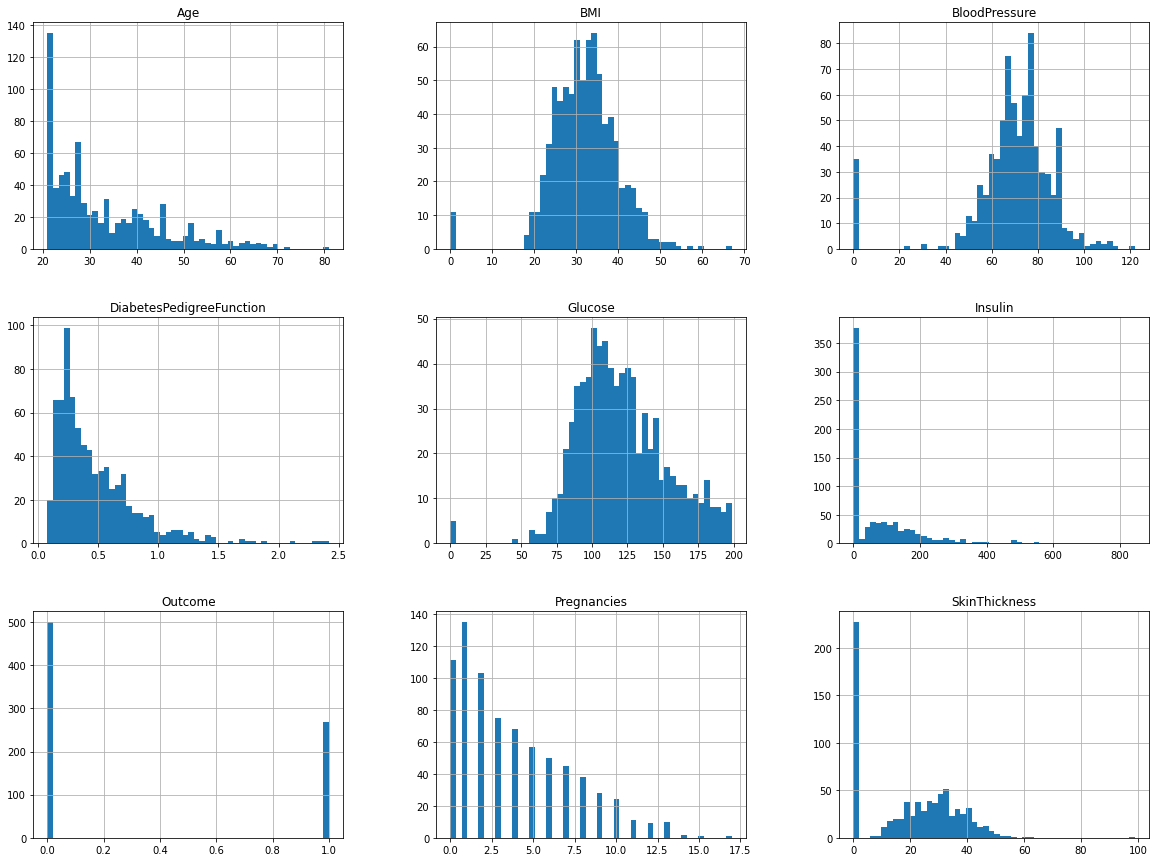

In [8]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

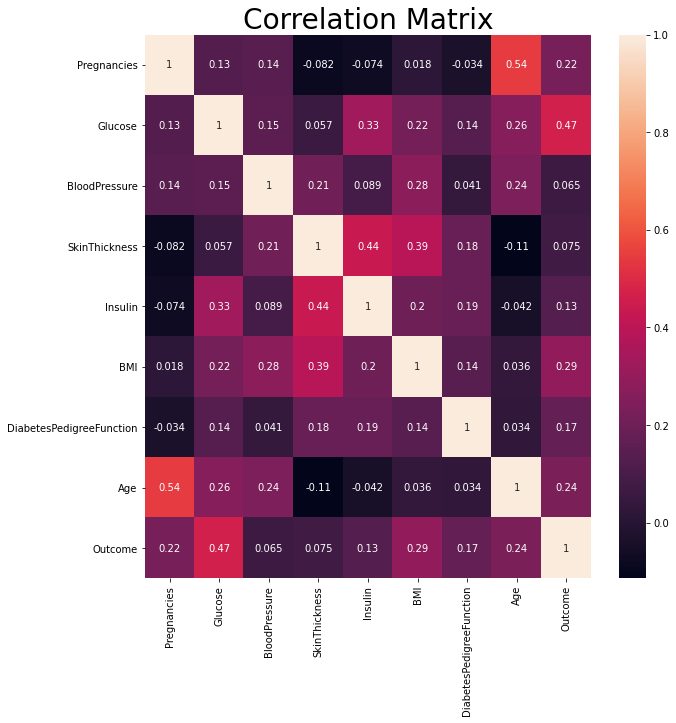

In [9]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
matcorr=dataset.corr()
sns.heatmap(matcorr, annot=True)
plt.title("Correlation Matrix",fontsize=28)
plt.show()

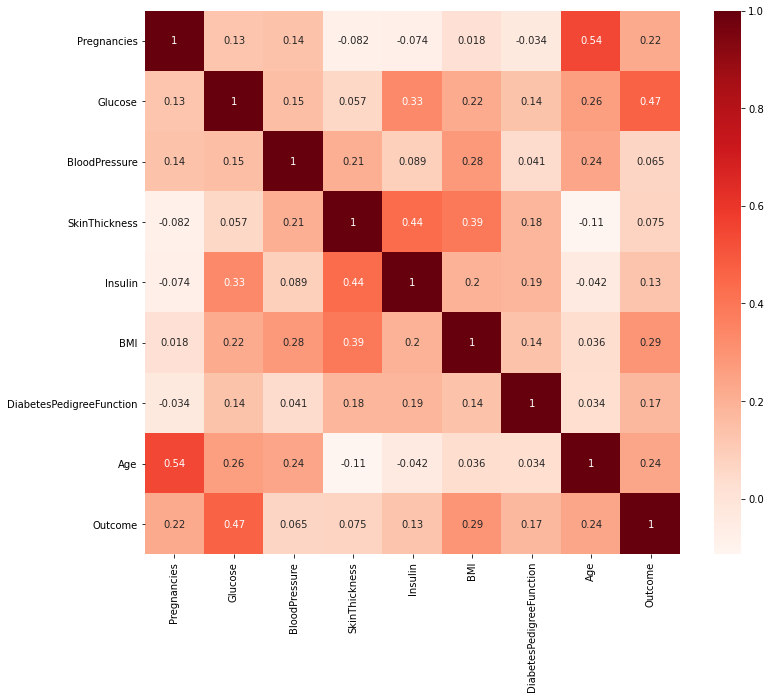

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
# Create features and labels
features=dataset.drop(["Outcome"],axis=1)
labels=dataset['Outcome']

## 2. Split the data and use kNN model for k=5

In [10]:
# Split data
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=42)

In [11]:
# Import kNN 
from sklearn.neighbors import KNeighborsClassifier
# Set k=5 , common starting point for k
classifier = KNeighborsClassifier(n_neighbors=5)

In [12]:
# Fit and predict data
classifier.fit(features_train,labels_train)
pred = classifier.predict(features_test)

In [13]:
# Check accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(labels_test,pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.66


In [14]:
from sklearn.metrics import precision_score
precision=precision_score(labels_test,pred)
print("Precision: {:.2f}".format(precision))

Precision: 0.52


In [17]:
from sklearn.metrics import recall_score
recall=recall_score(labels_test,pred)
print("Recall: {:.2f}".format(recall))

Recall: 0.55


In [18]:
from sklearn.metrics import f1_score
f1=f1_score(labels_test,pred)
print("F1 score: {:.2f}".format(f1))

F1 score: 0.54


In [19]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(labels_test,pred)
print("AUROC score: {:.2f}".format(roc_auc))

AUROC score: 0.63


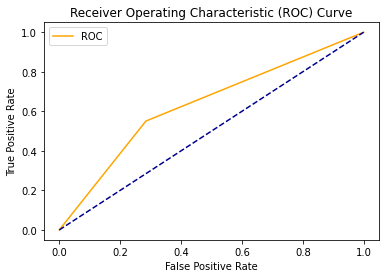

In [20]:
# AUROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(labels_test,pred)

def plot_roc_curve(f,t):
    plt.plot(f,t,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)


## 3. Find the performace matrix for other k values

In [21]:
def performance_df(df,li):
    '''
    the function takes a list of k values and display the performance matrix as a dataframe
    args: li- takes a list of integers
    returns: a dataframe 
    '''
    features=df.drop(["Outcome"],axis=1)
    labels=df['Outcome']
    features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=42)
    results=[]
    for i in li:
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(features_train,labels_train)
        pred = classifier.predict(features_test)
        accuracy=round(accuracy_score(labels_test,pred),4)
        precision = round(precision_score(labels_test,pred),4)
        recall = round(recall_score(labels_test,pred),4)
        f1 = round(f1_score(labels_test,pred),4)
        roc_auc=round(roc_auc_score(labels_test,pred),4)
        
        results.append([i,accuracy, precision,recall,f1,roc_auc])
        
    res_df=pd.DataFrame(results,columns=["k","Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
    return res_df

       

## 5. Display the performance matrix for the k values

In [22]:
performance_df(dataset,[3,5,7,9,15])

,k,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,3,0.6406,0.5000,0.5797,0.5369,0.6273
1,5,0.6562,0.5205,0.5507,0.5352,0.6331
2,7,0.6823,0.5541,0.5942,0.5734,0.6630
3,9,0.7135,0.5972,0.6232,0.6099,0.6937
4,15,0.7396,0.6667,0.5507,0.6032,0.6981


In [23]:
def plot_curves(li):
    '''
    function plots the AUROC curves for different values of k
    arg: li= list of integers
    return: graphical plots
    '''
    for i in li:
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(features_train,labels_train)
        pred = classifier.predict(features_test)
        fpr,tpr,thresholds=roc_curve(labels_test,pred)
        print("When k nearest neighbors = ",i)
        plot_roc_curve(fpr,tpr)
        plt.show()

When k nearest neighbors =  3


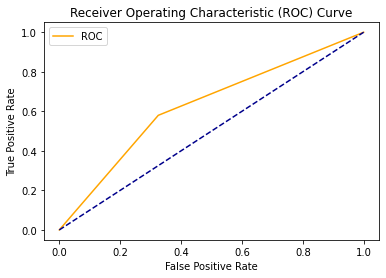

When k nearest neighbors =  5


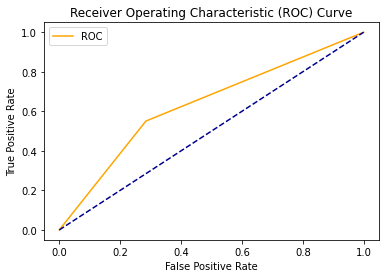

When k nearest neighbors =  7


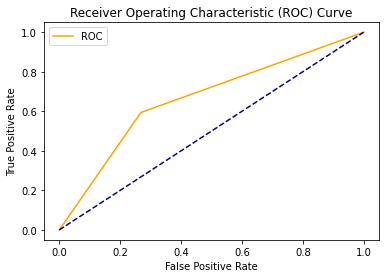

When k nearest neighbors =  9


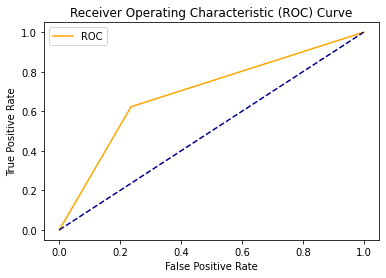

When k nearest neighbors =  15


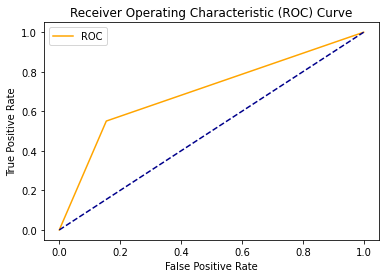

In [24]:
plot_curves([3,5,7,9,15])

## 5.1/5.2 line plots showing the performace matrix

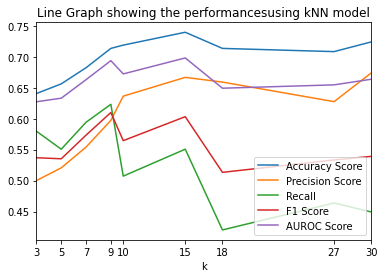

In [25]:
def plot_performace(li,dataf):
    '''
    function displays the performance matrix as a line graph for different k values 
    '''
    return dataf.plot.line(x="k",title="Line Graph showing the performancesusing kNN model",xticks=li)

li=[3,5,7,9,10,15,18,27,30]
plot_performace(li,performance_df(dataset,li))
plt.show()

## 7. Use GridCV to find best hyperparameter 

In [26]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()

parameter = {'n_neighbors':[3,5,9,10,15,18,20,23]}

clf = GridSearchCV(estimator, parameter) # performing gridsearch 


In [27]:
clf.fit(features_train,labels_train) #fitting the model


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 10, 15, 18, 20, 23]})

In [28]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [29]:
clf.best_params_         # best parameter value for each attribute displayed

{'n_neighbors': 10}

In [30]:
performance_df(dataset,[10])

,k,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,10,0.7188,0.6364,0.5072,0.5645,0.6723


## 8. Conclusion 

1. From the histograms we see that not all the features follow a normal distribution. Also we see that the features- skinThickness,insulin,BMI and bloodpressure have a comparatively higher number of zero's in them, which does not make the data very relaible. Thus in the later sections we must do standarization/normalization and imputations to check if this improves the dataset or not. 

2. From the correlation matrix we observe the relationships between any 2 features. Almost all of the features had a postive correlation with each other,there were a few with negative correlation, but it wasn't a strong negative correlation.

3. Using the GridCV - cross validation technique to find the best hyperparameters for kNN, we observe that kNN performs optimally when the number of neighbors is 9 or 10. 

## Scaling Methods- Standardization / Normalization

In [31]:
from sklearn.preprocessing import StandardScaler,Normalizer
x_sc=StandardScaler()
features_train_scaled=x_sc.fit_transform(features_train)
features_test_scaled=x_sc.fit_transform(features_test)

In [32]:
# nm=Normalizer()
nm=MinMaxScaler()
features_train_norm=nm.fit_transform(features_train)
features_test_norm=nm.fit_transform(features_test)

In [33]:
def perform(k_values,f_pro_train,f_pro_test,ftest,ltrain,ltest):
    '''
    fuction to find performance matrix for standardized and normalized data
    '''
    results=[]
    for i in k_values:
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(f_pro_train,ltrain)
        pred = classifier.predict(f_pro_test)
        accuracy=round(accuracy_score(ltest,pred),4)
        precision = round(precision_score(labels_test,pred),4)
        recall = round(recall_score(labels_test,pred),4)
        f1 = round(f1_score(labels_test,pred),4)
        roc_auc=round(roc_auc_score(labels_test,pred),4)
        results.append([i,accuracy, precision,recall,f1,roc_auc])
    res_df=pd.DataFrame(results,columns=["k","Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
    return res_df

Line plot representing the performance matrix for Normalized data


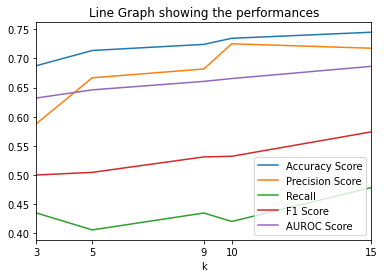

,k,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,3,0.6875,0.5882,0.4348,0.5000,0.6320
1,5,0.7135,0.6667,0.4058,0.5045,0.6460
2,9,0.7240,0.6818,0.4348,0.5310,0.6605
3,10,0.7344,0.7250,0.4203,0.5321,0.6654
4,15,0.7448,0.7174,0.4783,0.5739,0.6863


In [34]:
print("Line plot representing the performance matrix for Normalized data")
dnorm=perform([3,5,9,10,15],features_train_norm,features_test_norm,features_test,labels_train,labels_test)
dnorm.plot.line(x="k",title="Line Graph showing the performances",xticks=[3,5,9,10,15])
plt.show()
dnorm

In [35]:
norm_df= perform([10],features_train_norm,features_test_norm,features_test,labels_train,labels_test)

Line plot representing the performance matrix for Standardized data


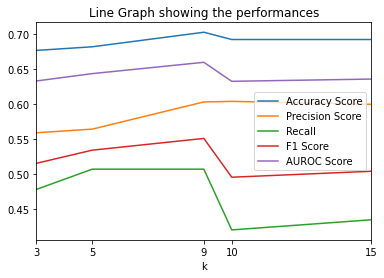

,k,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,3,0.6771,0.5593,0.4783,0.5156,0.6334
1,5,0.6823,0.5645,0.5072,0.5344,0.6439
2,9,0.7031,0.6034,0.5072,0.5512,0.6601
3,10,0.6927,0.6042,0.4203,0.4957,0.6329
4,15,0.6927,0.6000,0.4348,0.5042,0.6361


In [36]:
print("Line plot representing the performance matrix for Standardized data")
dstd=perform([3,5,9,10,15],features_train_scaled,features_test_scaled,features_test,labels_train,labels_test)
dstd.plot.line(x="k",title="Line Graph showing the performances",xticks=[3,5,9,10,15])
plt.show()
dstd

#### Note: 
From the above graphs and dataframes, we would prefer to choose Normalization over standardization, as we get higher precision scores. 

Normalization is generally used on a dataset which does not follow a Gaussian/normal distribution. And from the histograms of features we saw before, we know that not all features follow a normal distribution. 

Also, the kNN does not necessarily need a normally distrubuted data. Thus, in order to increase the perfomance of the kNN model- we should use a normally distributed data with k=9 or 10 neighbors.

## Imputation

In [37]:
def data_imputer(data,strategy):
    fea=['Glucose','BMI','Insulin','BloodPressure','SkinThickness']
    if strategy == 'knn':
        imputer= KNNImputer(missing_values=0,n_neighbors=9) 
    else:
        imputer = SimpleImputer(missing_values=np.nan,strategy=strategy)
        
    imputer = imputer.fit(data.loc[:,fea])
    imputer = imputer.transform(data.loc[:,fea])
    imp_df = pd.DataFrame(imputer,columns=fea)
    imp_df[data.columns.difference(fea)]=dataset[data.columns.difference(fea)]
    imp_df["Outcome"]=dataset.Outcome
    return imp_df

In [38]:
def imputer_performance(df):
    res=[]
    features=df.drop(["Outcome"],axis=1)
    labels=df['Outcome']
    features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=123)
    
    classifier = KNeighborsClassifier(n_neighbors=9)
    classifier.fit(features_train,labels_train)
    pred = classifier.predict(features_test)
    
    classifier.fit(features_train,labels_train)
    pred_y_3=classifier.predict(features_test)
    
    accuracy=round(accuracy_score(labels_test,pred_y_3),4)
    precision = round(precision_score(labels_test,pred_y_3),4)
    recall = round(recall_score(labels_test,pred_y_3),4)
    f1 = round(f1_score(labels_test,pred_y_3),4)
    roc_auc=round(roc_auc_score(labels_test,pred_y_3),4)
    
    res.append([accuracy, precision,recall,f1,roc_auc])
    res_df=pd.DataFrame(res,columns=["Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
    
    return res_df

In [39]:
d1=imputer_performance(data_imputer(features,'median'))
d2=imputer_performance(data_imputer(features,'mean'))
d3=imputer_performance(data_imputer(features,'most_frequent'))
d4=imputer_performance(data_imputer(features,'knn'))
d5=imputer_performance(data_imputer(features,'constant'))
mer = pd.concat([d1,d2,d3,d4,d5], axis=0)
mer["Type"]=(("Median",) +("Mean",)+("Most_frequent",)+("kNN",)+("Constant",))
mer

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score,Type
0,0.7604,0.7288,0.5890,0.6515,0.7273,Median
0,0.7604,0.7288,0.5890,0.6515,0.7273,Mean
0,0.7604,0.7288,0.5890,0.6515,0.7273,Most_frequent
0,0.7448,0.6875,0.6027,0.6423,0.7173,kNN
0,0.7604,0.7288,0.5890,0.6515,0.7273,Constant


#### Since the imputation does not seem to have a significant impact on the performance, we choose to ignore Imputations in this case

## Treating imbalanced data

In [40]:
df_majority=dataset[dataset.Outcome==0]
df_minority=dataset[dataset.Outcome==1]
df_minority_upsampled=resample(df_minority,replace=True,
                               n_samples=500,random_state=42)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [41]:
df_majority_downsampled=resample(df_majority,replace=False,
                               n_samples=268,random_state=123)
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
df_downsampled.Outcome.value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [42]:
def treat_imbalance(df,method):
    df_majority=df[df.Outcome==0]
    df_minority=df[df.Outcome==1]
    if method=="Up-sampling":
        df_minority_upsampled=resample(df_minority,replace=True,
                               n_samples=500,random_state=123)
        df_upsampled=pd.concat([df_majority,df_minority_upsampled])
        return df_upsampled
    elif method=="Down-sampling":
        df_majority_downsampled=resample(df_majority,replace=False,
                               n_samples=268,random_state=123)
        df_downsampled=pd.concat([df_majority_downsampled,df_minority])
        return df_downsampled
    else:
        print("Incorrect method")

In [43]:
treat_imbalance(dataset,"Up-sampling").shape

(1000, 9)

In [44]:
treat_imbalance(dataset,"Down-sampling").shape

(536, 9)

In [45]:
def split(df):
    # Create features and labels
    features=df.drop(["Outcome"],axis=1)
    labels=df['Outcome']
    features_train,features_test,labels_train,labels_test=train_test_split(features,labels,
                                                                           test_size=0.25,random_state=42)
    return features_train,features_test,labels_train,labels_test

In [46]:
performance_df(dataset,[10])

,k,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,10,0.7188,0.6364,0.5072,0.5645,0.6723


In [47]:
d1=performance_df(dataset,[10]).drop(["k"],axis=1)
data=treat_imbalance(dataset,"Up-sampling")
d2=performance_df(data,[10]).drop(["k"],axis=1)
data1=treat_imbalance(dataset,"Down-sampling")
d3=performance_df(data1,[10]).drop(["k"],axis=1)

In [48]:
mer = pd.concat([d1.T,d2.T,d3.T], axis=0, ignore_index=False)
mer.reset_index(inplace=True)
mer["type"]=(5*("unchanged",) +5*("up-scaled",)+5*("down-scaled",))

#### Visualize imbalance at k=10

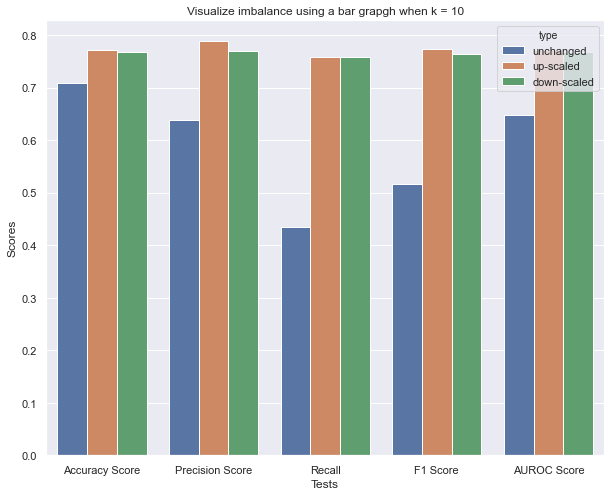

In [222]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(data=mer,x='index', y=0, hue='type')
ax.set(xlabel='Tests', ylabel='Scores')
plt.title("Visualize imbalance using a bar grapgh when k = 10")
plt.show()

#### Visualize imbalance at different k values

In [50]:
def plot_test_graphs(df,k):
    d1=performance_df(df,k).drop(["k"],axis=1)
    
    data=treat_imbalance(dataset,"Up-sampling")
    d2=performance_df(data,k).drop(["k"],axis=1)
    
    data1=treat_imbalance(dataset,"Down-sampling")
    d3=performance_df(data1,k).drop(["k"],axis=1)
    
    
    mer = pd.concat([d1.T,d2.T,d3.T], axis=0, ignore_index=False)
    mer.reset_index(inplace=True)
    mer["type"]=(5*("unchanged",) +5*("up-scaled",)+5*("down-scaled",))
    return mer 
    

Visualize imbalance using a bar graph when k =  3


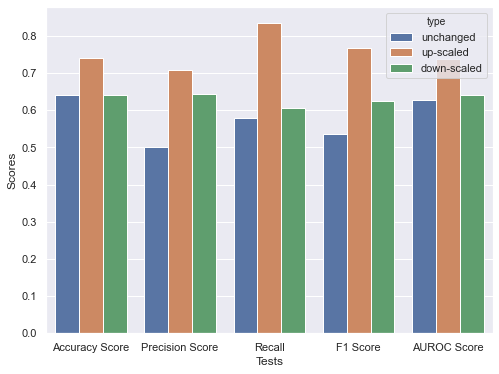

Visualize imbalance using a bar graph when k =  5


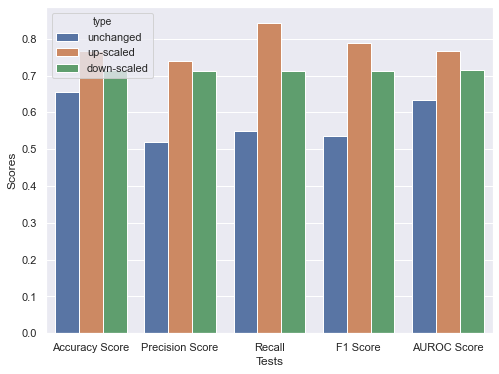

Visualize imbalance using a bar graph when k =  9


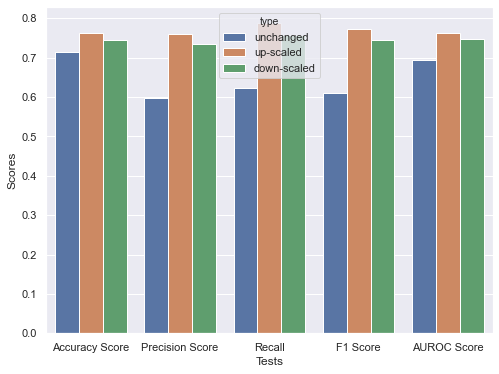

Visualize imbalance using a bar graph when k =  10


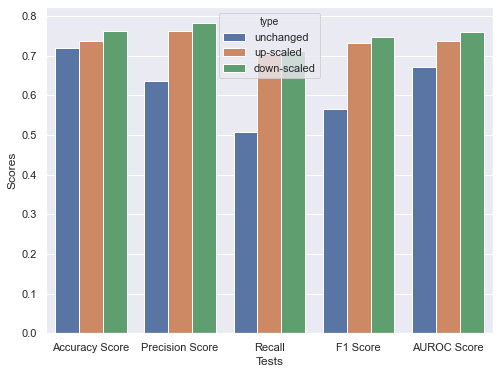

Visualize imbalance using a bar graph when k =  15


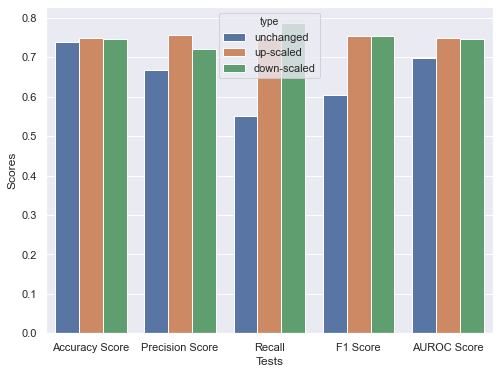

Visualize imbalance using a bar graph when k =  20


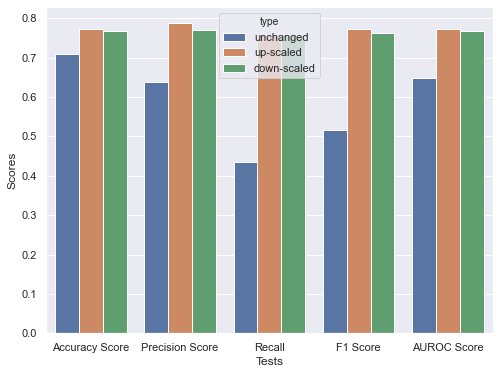

In [51]:
for i in [3,5,9,10,15,20]:
    print("Visualize imbalance using a bar graph when k = ",i)
    mer= plot_test_graphs(dataset,[i])
    sns.set(rc={'figure.figsize':(8,6)})
    ax=sns.barplot(data=mer,x='index', y=0, hue='type')
    ax.set(xlabel='Tests', ylabel='Scores')
    plt.show()

#### We observe that the use of either upscale or downscale would be better than using the unchanged dataset. And since we are focusing on k=9, all the performance scores are higher in case of up-scaled data. Hence we shall be using that. 

#### Calculate optimum kNN performance matrix

In [203]:
down_data=treat_imbalance(dataset,"Down-sampling")
features=down_data.drop(["Outcome"],axis=1)
labels=down_data['Outcome']

# Split data
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=42)
nm=MinMaxScaler()
features_train_norm=nm.fit_transform(features_train)
features_test_norm=nm.fit_transform(features_test)

classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(features_train_norm,labels_train)
pred = classifier.predict(features_test_norm)

results=[]
accuracy=round(accuracy_score(labels_test,pred),4)
precision = round(precision_score(labels_test,pred),4)
recall = round(recall_score(labels_test,pred),4)
f1 = round(f1_score(labels_test,pred),4)
roc_auc=round(roc_auc_score(labels_test,pred),4)

results.append([accuracy, precision,recall,f1,roc_auc])
kNN_performance=pd.DataFrame(results,columns=["Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
kNN_performance



,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.7239,0.7959,0.5909,0.6783,0.7219


## SVM

In [53]:
x=dataset.drop(["Outcome"],axis=1)
y=dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=42)

In [200]:
def penalize(df):
    res=[]
    x=df.drop(["Outcome"],axis=1)
    y=df['Outcome']
    clf=SVC(kernel="linear",class_weight="balanced",probability=True)
    clf.fit(x,y)
    pred_y_3=clf.predict(x)
    
    accuracy=round(accuracy_score(y,pred_y_3),4)
    precision = round(precision_score(y,pred_y_3),4)
    recall = round(recall_score(y,pred_y_3),4)
    f1 = round(f1_score(y,pred_y_3),4)
    roc_auc=round(roc_auc_score(y,pred_y_3),4)
    
    res.append([accuracy, precision,recall,f1,roc_auc])
    res_df=pd.DataFrame(res,columns=["Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
    
    return res_df

In [201]:
penalize(dataset)

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.7682,0.651,0.7239,0.6855,0.7579


In [202]:
ker=['linear','poly','rbf','sigmoid']
res=[]
for i in ker:
    svclassifier = SVC(kernel=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test) 
    accuracy=round(accuracy_score(y_test,y_pred),4)
    precision = round(precision_score(y_test,y_pred),4)
    recall = round(recall_score(y_test,y_pred),4)
    f1 = round(f1_score(y_test,y_pred),4)
    roc_auc=round(roc_auc_score(y_test,y_pred),4)
    res.append([i,accuracy, precision,recall,f1,roc_auc])
    res_df=pd.DataFrame(res,columns=["Kernel","Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
res_df

,Kernel,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,linear,0.7292,0.6197,0.6377,0.6286,0.7091
1,poly,0.7344,0.6667,0.5217,0.5854,0.6877
2,rbf,0.7292,0.6667,0.4928,0.5667,0.6773
3,sigmoid,0.5521,0.2927,0.1739,0.2182,0.4691


#### We observe that penalizing the data for SVM has a higher performace score than the raw data, hence we use penalizationfor the final SVM model

In [509]:
cval=[0.1,0.5,1,2,2.5,3,5,7,10,15,20]
res=[]
for i in cval:
    svclassifier = SVC(C=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test) 
    accuracy=round(accuracy_score(y_test,y_pred),6)
    precision = round(precision_score(y_test,y_pred),6)
    recall = round(recall_score(y_test,y_pred),6)
    f1 = round(f1_score(y_test,y_pred),6)
    roc_auc=round(roc_auc_score(y_test,y_pred),6)
    res.append([i,accuracy, precision,recall,f1,roc_auc])
    res_df=pd.DataFrame(res,columns=["C value","Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])
res_df

,C value,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.1,0.662338,0.562500,0.1125,0.187500,0.533071
1,0.5,0.735931,0.666667,0.4750,0.554745,0.674586
2,1.0,0.735931,0.661017,0.4875,0.561151,0.677525
3,2.0,0.748918,0.666667,0.5500,0.602740,0.702152
4,2.5,0.757576,0.687500,0.5500,0.611111,0.708775
5,3.0,0.748918,0.671875,0.5375,0.597222,0.699214
6,5.0,0.740260,0.642857,0.5625,0.600000,0.698469
7,7.0,0.744589,0.643836,0.5875,0.614379,0.707657
8,10.0,0.744589,0.640000,0.6000,0.619355,0.710596
9,15.0,0.744589,0.636364,0.6125,0.624204,0.713535


#### We observe that the most optimum kernal (in this run) is the poly kernal and similarly, the optimum C value is 2.5. We shall do a GridCV in order to find out which combination of the kernel and C value would yield most optimum performance scores. 
(I would like to say that until the previous runs yesterday, I was getting kernal=rbf as the most optimal choice. But now maybe there is change because I made some error in setting the random states)

In [501]:
# defining parameter range 
param_grid = {'C': [0.1,0.5,1,3,5,7,10],'kernel':['linear','poly','rbf','sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, kernel=linear, score=0.833, total=   0.3s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.750, total=   0.6s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.794, total=   0.3s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.738, total=   0.4s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.766, total=   0.3s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.769, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.759, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.757, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.710, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .

[CV] .................. C=3, kernel=linear, score=0.833, total=  14.6s
[CV] C=3, kernel=linear ..............................................
[CV] .................. C=3, kernel=linear, score=0.778, total=  11.0s
[CV] C=3, kernel=linear ..............................................
[CV] .................. C=3, kernel=linear, score=0.794, total=   4.5s
[CV] C=3, kernel=linear ..............................................
[CV] .................. C=3, kernel=linear, score=0.748, total=   6.9s
[CV] C=3, kernel=linear ..............................................
[CV] .................. C=3, kernel=linear, score=0.757, total=  11.2s
[CV] C=3, kernel=poly ................................................
[CV] .................... C=3, kernel=poly, score=0.787, total=   0.0s
[CV] C=3, kernel=poly ................................................
[CV] .................... C=3, kernel=poly, score=0.759, total=   0.0s
[CV] C=3, kernel=poly ................................................
[CV] .

[CV] ................. C=7, kernel=sigmoid, score=0.421, total=   0.0s
[CV] C=7, kernel=sigmoid .............................................
[CV] ................. C=7, kernel=sigmoid, score=0.430, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.824, total=  34.8s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.759, total=  38.8s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.794, total=  20.7s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.748, total=  29.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.766, total=  16.9s
[CV] C=10, kernel=poly ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  6.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 3, 5, 7, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [510]:
print(grid.best_params_) 

{'C': 3, 'kernel': 'linear'}


In [511]:
print(grid.best_estimator_) 

SVC(C=3, kernel='linear')


In [512]:
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### Calculate optimum SVM performance matrix

In [56]:
res=[]
down_data=treat_imbalance(dataset,"Down-sampling")
x=down_data.drop(["Outcome"],axis=1)
y=down_data['Outcome']
features_train,features_test,labels_train,labels_test=train_test_split(x,y,test_size=0.25,random_state=42)

nm=MinMaxScaler()
features_train_norm=nm.fit_transform(features_train)
features_test_norm=nm.fit_transform(features_test)

clf=SVC(kernel="linear",class_weight="balanced",probability=True,C=2.5)
clf.fit(features_train_norm,labels_train)
pred_y_3=clf.predict(features_test_norm)

accuracy=round(accuracy_score(labels_test,pred_y_3),4)
precision = round(precision_score(labels_test,pred_y_3),4)
recall = round(recall_score(labels_test,pred_y_3),4)
f1 = round(f1_score(labels_test,pred_y_3),4)
roc_auc=round(roc_auc_score(labels_test,pred_y_3),4)

res.append([accuracy, precision,recall,f1,roc_auc])
svm_performance=pd.DataFrame(res,columns=["Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])

svm_performance

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.7164,0.85,0.5152,0.6415,0.7135


## Logistic Regression

In [129]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

C:\Users\Pragya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [149]:
fea_logreg=pd.DataFrame(np.transpose(model.coef_),x.columns)
fea_logreg=fea.sort_values(by=[0])
fea_logreg

,0
BloodPressure,-0.012656
Insulin,-0.001578
SkinThickness,0.004419
Glucose,0.035839
Age,0.037635
Pregnancies,0.061485
BMI,0.101157
DiabetesPedigreeFunction,0.553426


In [132]:
predictions = model.predict(X_train)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.59      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537



#### Linear, Ridge and Lasso regression

In [133]:
linearmodel= LinearRegression()
linearmodel.fit(X_train,y_train)
print(linearmodel.score(X_test,y_test))

0.22240764966110582


In [134]:
cross_val_scores_ridges=[]
alpha=[]
for i in range(1,9):
    rm=Ridge(alpha=i*0.25)
    rm.fit(X_train,y_train)
    scores=cross_val_score(rm,x,y,cv=10)
    avg_cross_val_score=mean(scores)*100
    cross_val_scores_ridges.append(avg_cross_val_score)
    alpha.append(i*0.25)
print("Range of CV scores for ridge method - ")   
for i in range(0,len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridges[i]))

Range of CV scores for ridge method - 
0.25 : 25.804014252896966
0.5 : 25.804994716095397
0.75 : 25.80594126718456
1.0 : 25.80685454883154
1.25 : 25.807735190696917
1.5 : 25.808583809732028
1.75 : 25.809401010468402
2.0 : 25.81018738529973


In [135]:
rmc=Ridge(alpha=0.25)
rmc.fit(X_train,y_train)
print(rmc.score(X_test,y_test))

0.22233782816458225


In [136]:
cross_val_scores_lasso=[]
lam=[]
for i in range(1,9):
    lm=Lasso(alpha=i*0.25,tol=0.0925)
    lm.fit(X_train,y_train)
    scores=cross_val_score(lm,x,y,cv=10)
    avg_cross_val_score=mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    lam.append(i*0.25)

print("Range of CV scores for lasso method - ")   
for i in range(0,len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

Range of CV scores for lasso method - 
0.25 : 22.776847941683723
0.5 : 20.668082863864672
0.75 : 17.936360286823668
1.0 : 17.76677244340195
1.25 : 17.549557943936307
1.5 : 17.275459597910363
1.75 : 16.944477405324122
2.0 : 16.556611366177567


In [137]:
lmc=Lasso(alpha=0.25,tol=0.0925)
lmc.fit(X_train,y_train)
print(lmc.score(X_test,y_test))

0.192514387565774


In [138]:
models=["Linear Regression","Ridge Regression","Lasso Regression"]
scores=[lm.score(X_test,y_test),rmc.score(X_test,y_test),
        lmc.score(X_test,y_test)]

mapping={}
mapping["Linear Regression"] = linearmodel.score(X_test,y_test)
mapping["Ridge Regression"] = rmc.score(X_test,y_test)
mapping["Lasso Regression"] = lmc.score(X_test,y_test)

for k,v in mapping.items():
    print(str(k)+' : '+str(v))


Linear Regression : 0.22240764966110582
Ridge Regression : 0.22233782816458225
Lasso Regression : 0.192514387565774


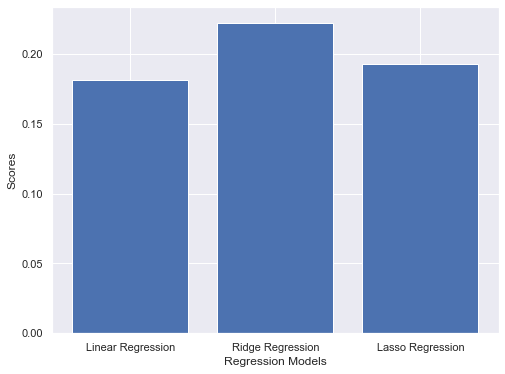

In [139]:
plt.bar(models,scores)
plt.xlabel("Regression Models")
plt.ylabel("Scores")
plt.show()

#### From the above graph we can conclude that Ridge Regression is comparatively the best, but the scores obtained are very poor

In [140]:
# fetures ranking
rmc=Ridge()
rmc.fit(X_train,y_train)
print(pd.DataFrame(np.transpose(rmc.coef_),x.columns))

                                 0
Pregnancies               0.008985
Glucose                   0.005743
BloodPressure            -0.001712
SkinThickness            -0.000249
Insulin                  -0.000126
BMI                       0.016176
DiabetesPedigreeFunction  0.071678
Age                       0.006267


#### Calculate optimum Logistic Regression performance matrix

In [213]:
def calc_perf(lt,p):
    '''
    function to calculate performance matrix
    '''
    res=[]
    accuracy=round(accuracy_score(lt,p),4)
    precision = round(precision_score(lt,p),4)
    recall = round(recall_score(lt,p),4)
    f1 = round(f1_score(lt,p),4)
    roc_auc=round(roc_auc_score(lt,p),4)

    res.append([accuracy, precision,recall,f1,roc_auc])
    logreg_performance=pd.DataFrame(res,columns=["Accuracy Score","Precision Score","Recall","F1 Score","AUROC Score"])

    return logreg_performance

In [216]:
# Trying Logistic Regression on Raw- unimputed or unscaled data
res=[]
x=dataset.drop(["Outcome"],axis=1)
y=dataset['Outcome']
features_train,features_test,labels_train,labels_test=train_test_split(x,y,test_size=0.25,random_state=42)

model = LogisticRegression()
model = model.fit(features_train,labels_train)
pred_y_3 = model.predict(features_test)

logreg_performance_raw=calc_perf(labels_test,pred_y_3)
logreg_performance_raw

C:\Users\Pragya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.7292,0.6164,0.6522,0.6338,0.7123


In [219]:
# Trying Logistic Regression on Normalized and Down-scaled dataset

res=[]
down_data=treat_imbalance(dataset,"Down-sampling")

x=down_data.drop(["Outcome"],axis=1)
y=down_data['Outcome']
features_train,features_test,labels_train,labels_test=train_test_split(x,y,test_size=0.25,random_state=42)

nm=MinMaxScaler()
features_train_norm=nm.fit_transform(features_train)
features_test_norm=nm.fit_transform(features_test)

model = LogisticRegression()
model = model.fit(features_train_norm,labels_train)
pred_y_3 = model.predict(features_test_norm)

clf=SVC(kernel="linear",class_weight="balanced",probability=True,C=2.5)

logreg_performance=calc_perf(labels_test,pred_y_3)
logreg_performance

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.7537,0.8367,0.6212,0.713,0.7518


#### We observe that normalized and down-scaled dataset has a compartively higher performance matrix for the SVM model, as compared to data that has not been scaled or imputed. 

## Random Forest

In [206]:
x=dataset.drop(["Outcome"],axis=1)
y=dataset['Outcome']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
rclf = RandomForestClassifier(n_jobs=2, random_state=0)
rclf.fit(X_train, y_train)
rpred=rclf.predict(X_test)
print(classification_report(y_test,rpred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.65      0.65      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



In [207]:
print("Training accuracy: ",rclf.score(X_train,y_train))
print("Testing accuracy: ",round(rclf.score(X_test,y_test),4))

Training accuracy:  1.0
Testing accuracy:  0.75


In [208]:
from operator import itemgetter
print("Features ranking using Random Forest:")
sorted(list(zip(X_train, rclf.feature_importances_)),key=itemgetter(1))

Features ranking using Random Forest:


[('SkinThickness', 0.07232722308355101),
 ('Insulin', 0.07802620124985421),
 ('Pregnancies', 0.08088529344483156),
 ('BloodPressure', 0.08763431182369662),
 ('DiabetesPedigreeFunction', 0.11850185189739448),
 ('Age', 0.14920847982276925),
 ('BMI', 0.16076967673712264),
 ('Glucose', 0.2526469619407803)]

#### Hyperparameter tuning using GridCV

In [161]:
estimator_1 = RandomForestClassifier(min_samples_split=10,
                                   max_features="sqrt",
                                   n_jobs=-1,
                                   random_state=42)

parameters = {'min_samples_split':[2,5,10,15],
              'min_samples_leaf':[5,10,15,20],                    # list of parameters with different choices to be tested for
              'n_estimators':[5,10,100,300,500]}

In [162]:
clf1 = GridSearchCV(estimator_1, parameters) # performing gridsearch 
clf1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt',
                                              min_samples_split=10, n_jobs=-1,
                                              random_state=42),
             param_grid={'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 100, 300, 500]})

In [163]:
sorted(clf1.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [164]:
clf1.best_score_

0.7847076461769117

In [165]:
clf1.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}

#### Calculate optimum performance matrix using Random Forest 

In [210]:
# Performance matrix for Random forest on raw data (not scaled or imputed)
ran_clf = RandomForestClassifier(n_jobs=-1,random_state=42, min_samples_leaf= 5,
                              min_samples_split= 5, n_estimators= 100)
ran_clf.fit(X_train, y_train)
rpred=ran_clf.predict(X_test)
calc_perf(y_test,rpred)

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.75,0.6567,0.6377,0.6471,0.7253


In [211]:
# Performance matrix for Random forest on Up-scaled and normalized data
up_data=treat_imbalance(dataset,"Up-sampling")
x=up_data.drop(["Outcome"],axis=1)
y=up_data['Outcome']
features_train,features_test,labels_train,labels_test=train_test_split(x,y,test_size=0.25,random_state=42)
nm=MinMaxScaler()
features_train_norm=nm.fit_transform(features_train)
features_test_norm=nm.fit_transform(features_test)
ran_clf = RandomForestClassifier(n_jobs=-1,random_state=42, min_samples_leaf= 5,
                              min_samples_split= 5, n_estimators= 100)
ran_clf.fit(features_train_norm, labels_train)
rpred=ran_clf.predict(features_test_norm)

In [212]:
random_performance=calc_ranperf(labels_test,rpred)
random_performance

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score
0,0.852,0.8583,0.8516,0.8549,0.852


## Feature Selection 

C:\Users\Pragya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


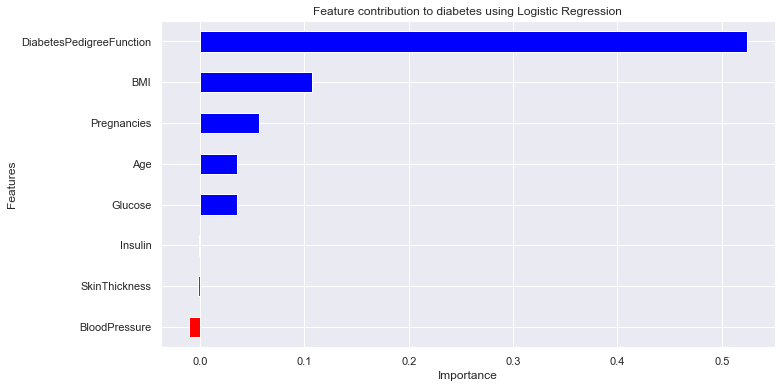

In [93]:
model = LogisticRegression()
model = model.fit(X_train,y_train)
coeff=list(model.coef_[0])
labels=list(X_train.columns)
features1=pd.DataFrame()
features1["Features"]=labels
features1["importance"]=coeff
features1.sort_values(by=["importance"],ascending=True,inplace=True)
features1['positive']=features1["importance"]>0
features1.set_index("Features",inplace=True)
features1.importance.plot(kind="barh",figsize=(11,6),color=
                          features1.positive.map({True:'blue',False:'red'}))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature contribution to diabetes using Logistic Regression")
plt.show()

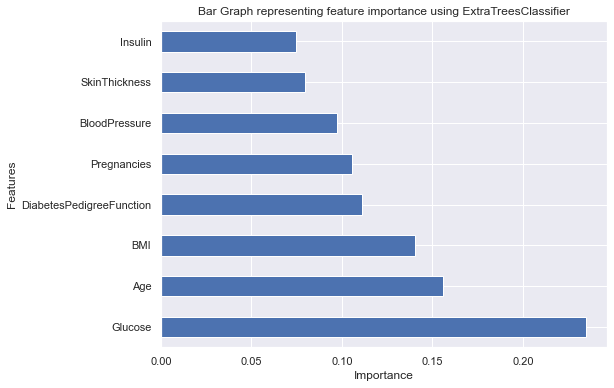

In [220]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Bar Graph representing feature importance using ExtraTreesClassifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

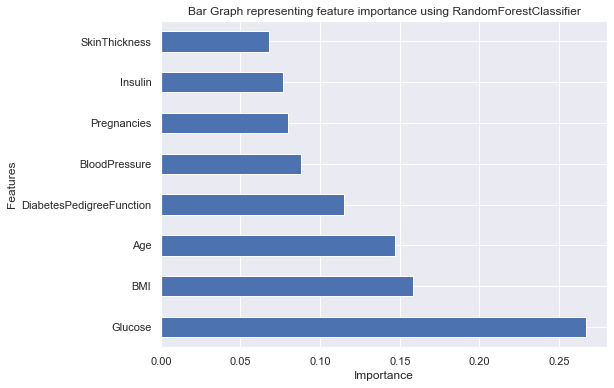

In [221]:
rmodel =  RandomForestClassifier()
rmodel.fit(X_train,y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rmodel.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Bar Graph representing feature importance using RandomForestClassifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### Inference
In case of logistic regression, we see that DiabetesPedigreeFunction is the most important feature, followed by BMI, Pregnancies, Age and Glucose. Blood pressure and SkinThickness are not considered to be important features which contribute to detecting the outcome accurately. 

But on observing the feature ranking generated by Random Forest model, we see that Gluose level holds the highest rank, followed by BMI,Age and DiabetesPedrigreeFunction. 

- From these observations, we can conclude that the 4 main features which can help identify the outcome (if a person has diabetes or not) are : Glucose, DiabetesPedigreeFunction,Age and BMI. 


According to the paper- Early Detection of Diabetes Mellitus using Feature Selection and Fuzzy Support Vector Machine by Lukmanto, et al. have concluded that Plasma Glucose Concentration and Body Mass Index are 2 most important features on basis of their F-score. 

(link- https://www.sciencedirect.com/science/article/pii/S1877050919310580# )


Another paper on Feature selection and classification model construction on type 2 diabetic patients' data by Yue Huang et al, have concluded that : patients’ ‘age’, ‘diagnosis duration’, the need for ‘insulin treatment’, ‘random blood glucose’ measurement and ‘diet treatment’ are the most important factors influencing blood glucose control.

(link- https://www.sciencedirect.com/science/article/pii/S0933365707000851?via%3Dihub )
 
Even from the data obtained from the mayo clinic website, we see that the features that are most important are : BMI, DiabetesPedigreeFunction,Age, Pregnancies, Blood Presure, Glucose and insulin.
Besides, glucose and pregnancies, the results in this project are in accordance with the mayo clinic generated results. 


## Comparision

In [186]:
d1=kNN_performance
d2=svm_performance
d3=logreg_performance
d4=random_performance

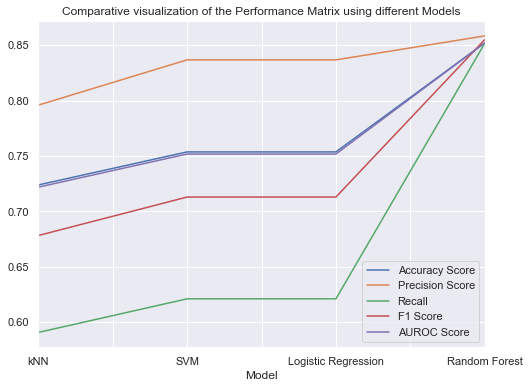

,Accuracy Score,Precision Score,Recall,F1 Score,AUROC Score,Model
0,0.7239,0.7959,0.5909,0.6783,0.7219,kNN
0,0.7537,0.8367,0.6212,0.7130,0.7518,SVM
0,0.7537,0.8367,0.6212,0.7130,0.7518,Logistic Regression
0,0.8520,0.8583,0.8516,0.8549,0.8520,Random Forest


In [199]:
merged = pd.concat([d1,d2,d3,d4], axis=0)
merged["Model"]=(("kNN",) +("SVM",)+("Logistic Regression",)+("Random Forest",))
merged.plot.line(x="Model",title="Line Graph showing the performances")
plt.title("Comparative visualization of the Performance Matrix using different Models")
plt.show()
merged

### From the project, we can conclude that Random Forests is the most optimal model that can be used on the diabetes dataset - as it gives comparitively the best performance scores.

Overall, we observed that for most models- scaling and imputation imroved the performace. 

In case of randomForest, we used the dataset that was Up-scaled and Normalized. For the other models, we used the dataset that was down-scaled and normalized. 